In [2]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

In [313]:
N = 100
D = 2
K = 4

# prepare random data
X = np.random.randn(N, D)
#X[N/5:] += np.random.randn(N/5, D) + 6
X[25:,1] += 5
X[50:,1] -= 5
X[50:,0] += 5
X[70:,1] -= 6
X[70:,0] += 6
#X[N/2:] += np.random.randn(N/3, D) + 6
#X[N/(K - 1):] += np.random.randn(N/(K - 1), D) + 12

In [314]:
X[:3]

array([[ 0.60675919, -0.96691754],
       [-0.03743275,  0.13516574],
       [-0.20377114,  0.07645437]])

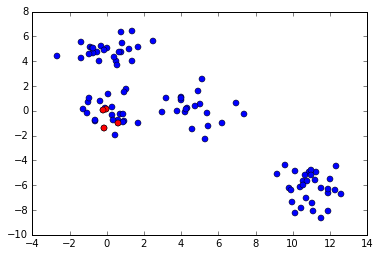

In [315]:
def chooseK(k):
    return X[:k]

clusters = chooseK(K)
clusters
plot(X, clusters)

In [316]:
def plot(X, clusters):
    plt.plot(X[:, 0], X[:,1], "bo")
    plt.plot(clusters[:,0], clusters[:,1], "ro")
    plt.show()

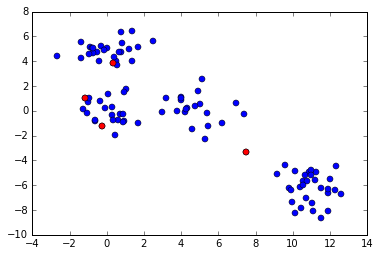

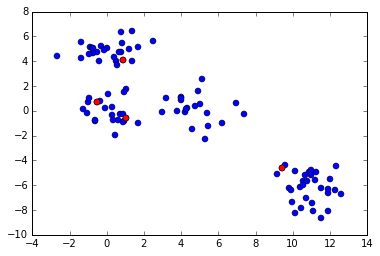

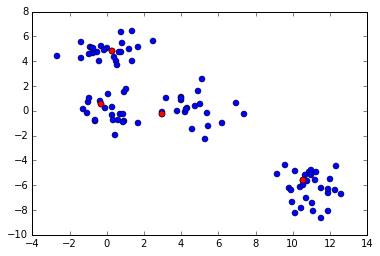

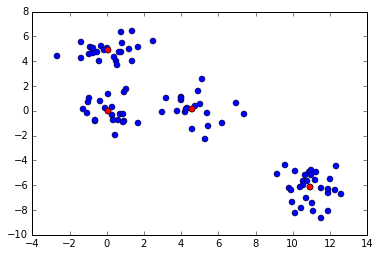

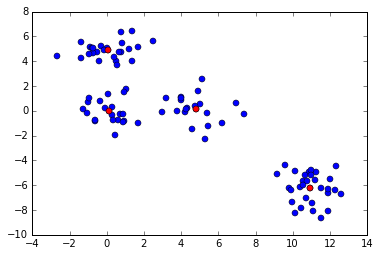

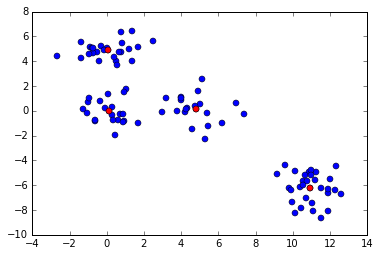

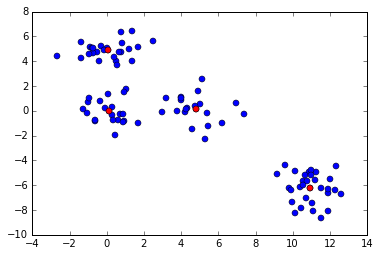

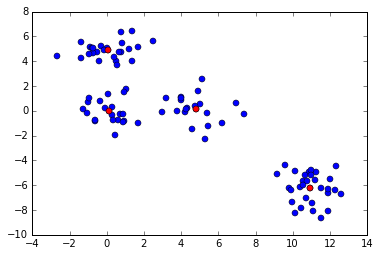

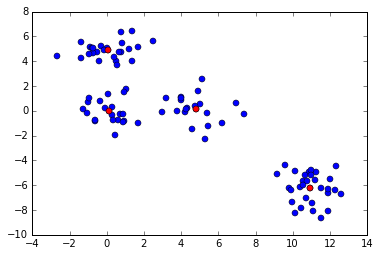

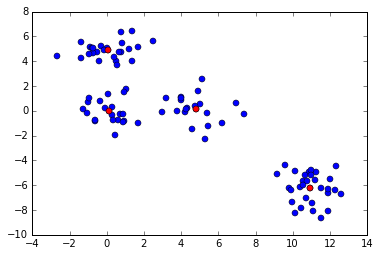

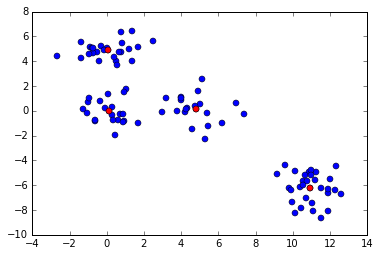

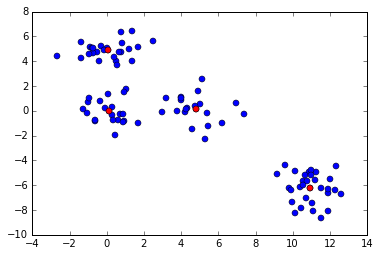

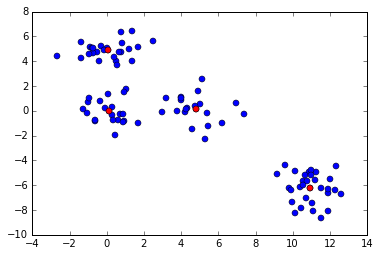

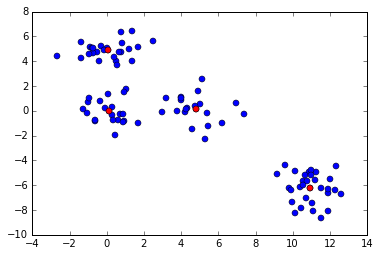

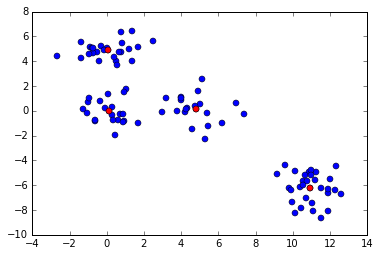

In [317]:
for i in range(15):
    errors = np.zeros((N, K))
    for i, x in enumerate(X):
        for j, c in enumerate(clusters):
            e = np.sum(np.power(x - c, 2))
            errors[i][j] = e
            #print
            #print errors
            #print "e,c,e", x, c, e

    assignments = np.argmin(errors, axis=1)
#     print assignments
#     print "c", clusters, assignments
    for j, c in enumerate(clusters):
        members = X[j == assignments]
        if members.sum(axis=0)[0]:
            clusters[j] = members.sum(axis=0) / float(len(members))
            #clusters[j] = 2
#             print members.sum(axis=0) / float(len(members))
#     print "c", clusters
    plot(X, clusters)